     t [s]      T [K]   vol [m3]       u [J/kg]
     0.005   1000.000      2.970   2.870654e+05
     0.010   1000.001      2.970   2.870654e+05
     0.015   1000.002      2.970   2.870654e+05
     0.020   1000.006      2.970   2.870654e+05
     0.025   1000.010      2.970   2.870654e+05
     0.030   1000.016      2.970   2.870654e+05
     0.035   1000.022      2.970   2.870654e+05
     0.040   1000.028      2.970   2.870654e+05
     0.045   1000.035      2.970   2.870654e+05
     0.050   1000.042      2.970   2.870654e+05
     0.055   1000.049      2.970   2.870654e+05
     0.060   1000.056      2.970   2.870654e+05
     0.065   1000.063      2.970   2.870654e+05
     0.070   1000.070      2.970   2.870654e+05
     0.075   1000.078      2.970   2.870654e+05
     0.080   1000.086      2.970   2.870654e+05
     0.085   1000.094      2.970   2.870654e+05
     0.090   1000.102      2.970   2.870654e+05
     0.095   1000.110      2.970   2.870654e+05
     0.100   1000.118      2.970   2.870

     1.085   2768.160      2.970   2.870654e+05
     1.090   2768.160      2.970   2.870654e+05
     1.095   2768.160      2.970   2.870654e+05
     1.100   2768.160      2.970   2.870654e+05
     1.105   2768.160      2.970   2.870654e+05
     1.110   2768.160      2.970   2.870654e+05
     1.115   2768.160      2.970   2.870654e+05
     1.120   2768.160      2.970   2.870654e+05
     1.125   2768.160      2.970   2.870654e+05
     1.130   2768.160      2.970   2.870654e+05
     1.135   2768.160      2.970   2.870654e+05
     1.140   2768.160      2.970   2.870654e+05
     1.145   2768.160      2.970   2.870654e+05
     1.150   2768.160      2.970   2.870654e+05
     1.155   2768.160      2.970   2.870654e+05
     1.160   2768.160      2.970   2.870654e+05
     1.165   2768.160      2.970   2.870654e+05
     1.170   2768.160      2.970   2.870654e+05
     1.175   2768.160      2.970   2.870654e+05
     1.180   2768.160      2.970   2.870654e+05
     1.185   2768.160      2.970   2.870

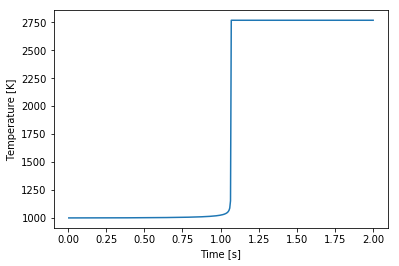

In [4]:
#cp_major = major.partial_molar_cp
#wdot_major = major.net_production_rates
#print(cp_major)
#print(wdot_major) 

import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#use reaction mechanism GRI-Mech 3.0
methane = ct.Solution('gri30.xml')
ethane = ct.Solution('gri30.xml')
propane = ct.Solution('gri30.xml')
#define stoichiometric fuel and gas mixtures
methane.TPX = 1000, ct.one_atm, 'CH4:1, O2:2, N2:7.52'
ethane.TPX = 1000, ct.one_atm, 'C2H6:1, O2:3.5, N2:13.6'
propane.TPX = 1000, ct.one_atm, 'C3H8:1, O2:5, N2:18.8'
#define reactors
combustor = ct.Reactor(methane)
igniter = ct.Reactor(methane)
crankcase = ct.Reservoir

#Ideal gas reactor
r = ct.Reactor(methane)

#Prepare the simulation with a ReactorNet object
sim = ct.ReactorNet([r])
time = 0.e-1

#Arrays to hold the datas

times = np.zeros(400)
rtemp = np.zeros(400)
data = np.zeros((400,4))

#Advance the simulation in time and print the internal evolution of
#temperature, volume and internal energy

print('%10s %10s %10s %14s' % ('t [s]','T [K]','vol [m3]','u [J/kg]'))
for n in range(400):
    time += 5.e-3
    sim.advance(time)
    times[n] = time # time in s
    rtemp[n]=r.T
    data[n,0]=r.T
    data[n,1:]=r.thermo['O2','H','CH4'].X
    print('%10.3f %10.3f %10.3f %14.6e' % (sim.time, r.T, r.thermo.v, r.thermo.u))
    
#Show graphs of T [K] against time
plt.plot(times, rtemp)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.show()